In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


In [ ]:
import pytesseract
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image


In [ ]:
#Since this was done on Google Colab, please mount your drive in this coding chunk.

In [ ]:
# The image is being turned into a string, since it is easier to process text as opposed to handwriting.
info = pytesseract.image_to_string(Image.open('.....location of image.../Image_2.jpg'))

In [ ]:
#This will allow us to look at the image and the image's information.
print(info)

    

EF TEL VD STE 101 CHES VA 23320 alee
mS
DEPARTMENT OF PUBLIC UTILITIES Bite

  

 

CG-16, 048 ear
Chesapeake, Virginia

New Tap Order MAY 20 4998

For Water f Sewer

Reduced Conn cay eis i ss Ne

Fee Expires Wo ULENANUE & OPERATIONS
; ——~CERMEL INC

Serviced For: = a

Name

Premises 600 CORBY GLEN AVENUE LT 133

(Location)

 

Application By
Conn Receipt 4

Fee 1440.00 no __##°89 pote 5/18/08 sy JW/MS

Condition: The Department of Public Utilities accepts Connec-
tion Fee and/or Meter Fee and the applicant agrees by his sig-
nature affixed that actual, physical connection to the water and/
or sanitary sewer of the above premises is not to be made, un-
til such time as notification is received that said mains have
been connected to the city's system and become a part thereof,

 

 

 

Plumbing
Plumber Permit No
Installation
Required:
Water Conn 3/4 Sanitary Sewer
Size Conn Size
Meter 5/8 Meter :
Size a= No Y4#OSGY AU Make we s
Meter od
Reading 2 ©2°
Location/

 

Remarks _&' 7 C

In [ ]:
#However, we also need to understand what the handwriting on the image states. This is why we will be using google cloud vision.
!pip install google-cloud-vision

In [ ]:
from IPython.display import Image
from matplotlib import pyplot as plt
import pandas as pd, numpy as np
pd.options.display.float_format = '{:,.2f}'.format

from google.cloud import vision
import io

import warnings
warnings.simplefilter("ignore")

import os, cv2

In [ ]:
#This is where a function is created that will help us find the horizontal lines on the image that show us where the handwriting is.

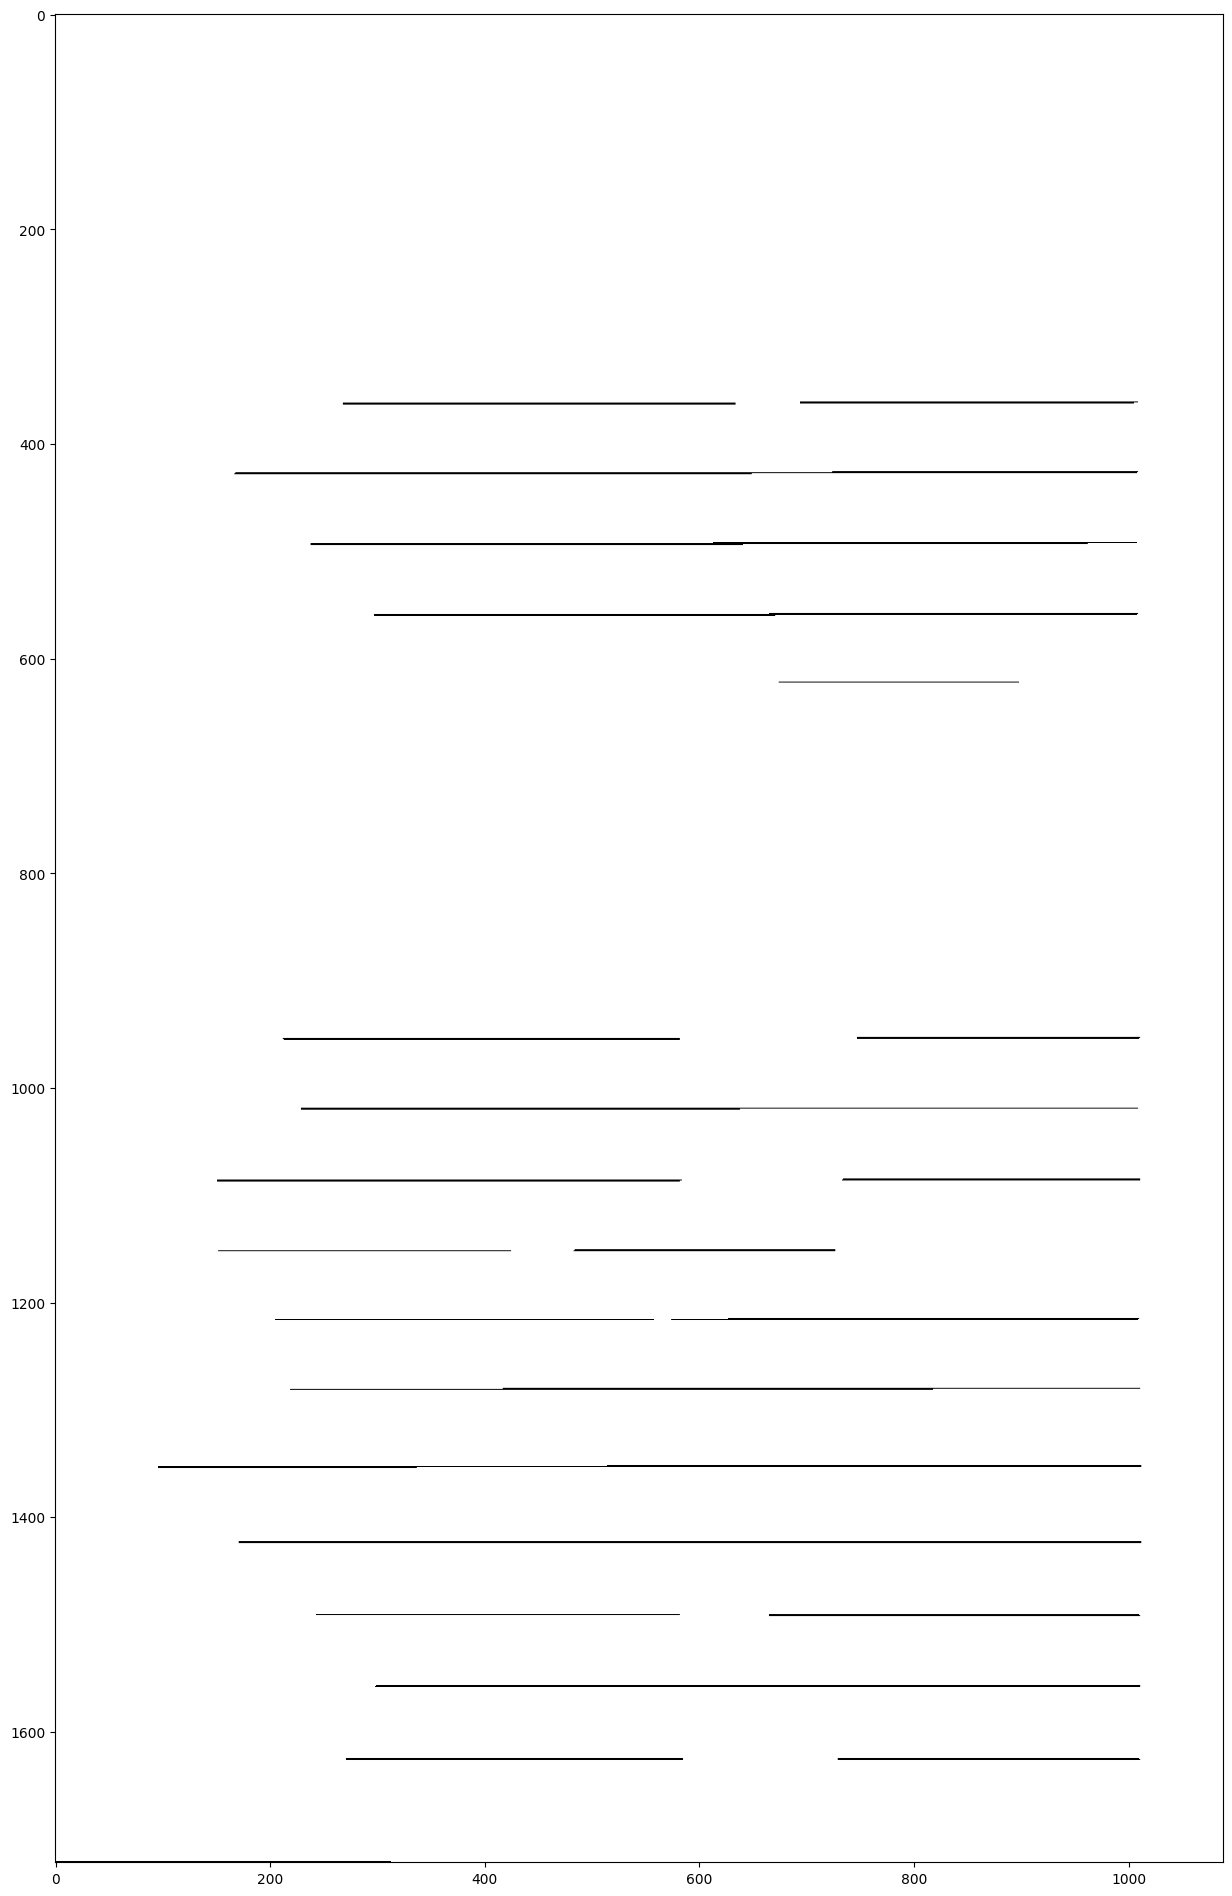

In [ ]:
picture = '......location of image/Image_2.jpg'

def Horizon_lines(picture):
    pic = cv2.imread(picture)


    gray_scale = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)


    thres_hold = cv2.threshold(gray_scale,30, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (200,1))


    locationoflines = cv2.morphologyEx(thres_hold, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)

    return locationoflines

locationoflines = Horizon_lines(picture)
plt.figure(figsize=(24,24))
plt.imshow(locationoflines, cmap='Greys')

In [ ]:
#This is an extra dataframe that will allow us a more precise understanding of the location of the handwriting text on image 2.
df_lines = pd.DataFrame(locationoflines.sum(axis=1)).reset_index()
df_lines.columns = ['rowLoc', 'LineLength']
df_lines[df_lines['LineLength'] > 0]

,rowLoc,LineLength
361,361,80325
362,362,172635
363,363,93330
426,426,72675
427,427,214200
428,428,122910
492,492,100725
493,493,184620
494,494,102765
558,558,87720


In [ ]:
#Look at the location of the lines of the image in addition to the dataframe that shows you where each handwrittten text is. Then, this dataframe (below) will be created to segment the image's handwritten portion into 4 segments.


df_Segments  = pd.DataFrame({
                                      "SegmentOrder": [1, 2, 3, 4],
                                      "SegmentStart":[1280, 1424, 1493, 1559],
                                      "Height":[150, 250, 250, 250]
})
df_Segments

,SegmentOrder,SegmentStart,Height
0,1,1280,150
1,2,1424,250
2,3,1493,250
3,4,1559,250


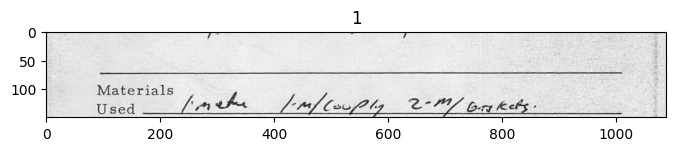

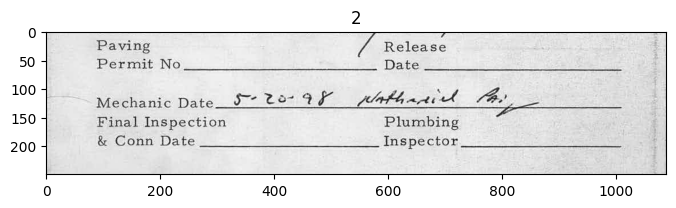

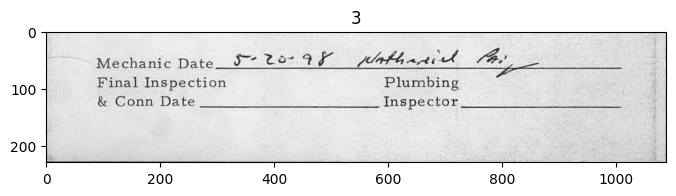

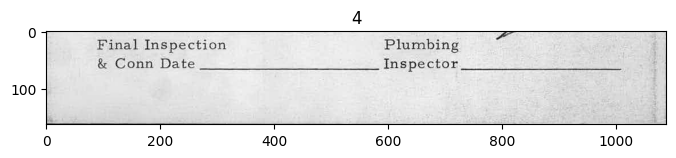

In [ ]:
#This is another function that was created that will crop the handwritten portion of the image into individual sections.

def IMGSegmented(picture, w, df_Segments):
    image = cv2.imread(picture)
    image2 = image.copy()
    segments = []

    for i in range(len(df_Segments)):
        y = df_Segments['SegmentStart'][i]
        h = df_Segments['Height'][i]

        cropped = image2[y:y + h, 0:w]
        segments.append(cropped)
        plt.figure(figsize=(8,8))
        plt.imshow(cropped)
        plt.title(str(i+1))

    return segments

img = '.......location of image/Image_2.jpg'
w = locationoflines.shape[1]
segments = IMGSegmented(picture, w, df_Segments)

In [ ]:
#This function was created to show that pytesseract does not extract text as well as google cloud vision.
import re
import cv2
import pytesseract
from pytesseract import Output



pytesseract.pytesseract.tesseract_cmd = ( r'/usr/bin/tesseract' )

def extractText(segment):
    text = pytesseract.image_to_string(segment, lang='eng')
    text = text.encode("gbk", 'ignore').decode("gbk", "ignore")

    return text

In [ ]:
segment = segments[0]
text = extractText(segment)
print(text)

 

 

Materials

Usea_ fathe  fnfOs ty 2°7V ombcts:



In [ ]:
#This is where we use the key and input the credentials from our environment.
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "location of the json keys' file.....json"
print('Credentials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))

In [ ]:
from google.cloud.vision_v1 import types as types

In [ ]:
#We have created two functions. The first function will turn the image into bytes. Then, we will feed it to Google Cloud's API. The second function will allow google vision to understand the handwritten chunk/segment.

def CloudVisionTextExt(handwrit):
    _, encoded_image = cv2.imencode('.png', handwrit)
    content = encoded_image.tobytes()
    image = types.Image(content=content)


    client = vision.ImageAnnotatorClient()
    response = client.document_text_detection(image=image)

    return response

def getTextVision(response):
    texts = []
    for page in response.full_text_annotation.pages:
        for i, block in enumerate(page.blocks):
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    word_text = ''.join([symbol.text for symbol in word.symbols])
                    texts.append(word_text)

    return ' '.join(texts)

In [ ]:
#This is google cloud vision's attempt to understand handwritten text. However, we can use string matching to correct for the last word or some of the words.
handwrit = segments[0]
response = CloudVisionTextExt(handwrit)
handText = getTextVision(response)
print(handText)

Materials Used limeter . / -M / Couply 2 - M / brakeets .


In [ ]:
!pip install fuzzywuzzy

In [ ]:
#This function will allow us to replace certain words in the text with the correct spellings.

def fuzzy_replace(str_word, str_text, threshold=85):
    l = len(str_word.split())
    splited = re.split(r'(\W+)',str_text)
    for i in range(len(splited)-l+1):
        temp = "".join(splited[i:i+l])
        if fuzz.ratio(str_word, temp) >= threshold:
            before = "".join(splited[:i])
            after = "".join(splited[i+l:])
            str_text= before + str_word + after
            splited = re.split(r'(\W+)',str_text)
    return str_text

In [ ]:
from fuzzywuzzy import fuzz
import re

common_words = ["meter", "brackets"]


for common_word in common_words:
  text = fuzzy_replace(common_word, handText, threshold=65)

In [ ]:
#This output has been mostly corrected for mispelled words through fuzz-matching.


print(text)

Materials Used limeter . / -M / Couply 2 - M / brackets .


Though fuzzy-matching can help when Google Cloud Vision is unable to fully recognize handwritten text, a better solution would be to use more advanced methods such as neural networks. 
